In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
game_stats_2021 = pd.read_csv('game_stats_2021.csv',index_col=[0])
game_stats_2022 = pd.read_csv('game_stats_2022.csv',index_col=[0])
game_scoring_2021 = pd.read_csv('game_scoring_2021.csv',index_col=[0])
game_scoring_2022 = pd.read_csv('game_scoring_2022.csv',index_col=[0])

In [3]:
game_stats_2021

,id,school,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401281942,Alabama,28-39,0,28,0-1,1,1,0.0,12.0,...,4.0,25,7.0,10-16,2.0,8-81,501,1,9.1,3.9
1,401281942,Miami,23-31,0,18,1-2,1,1,NaN,NaN,...,1.0,35,10.0,6-14,1.0,7-75,266,3,5.8,2.8
2,401281943,Arkansas,12-21,0,18,0-1,0,0,0.0,88.0,...,2.0,24,6.5,3-11,2.0,13-117,373,1,6.1,5.6
3,401281943,Rice,17-34,0,19,1-2,0,0,0.0,0.0,...,2.0,30,3.0,4-15,1.0,10-60,308,3,6.7,2.1
4,401281944,Akron,22-27,0,12,2-5,0,0,NaN,NaN,...,0.0,38,2.0,3-14,4.0,5-35,188,0,7.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,401319455,South Carolina State,30-47,0,24,2-2,0,0,NaN,NaN,...,1.0,32,3.0,6-13,NaN,5-45,428,3,7.5,2.8
1540,401327913,Fordham,18-30,0,12,1-4,0,2,NaN,NaN,...,1.0,52,3.0,2-13,0.0,2-15,292,3,5.4,4.6
1541,401327913,Nebraska,21-30,0,34,4-4,2,0,0.0,11.0,...,1.0,26,5.0,12-19,4.0,2-10,633,2,10.1,5.1
1542,401328545,Coastal Carolina,20-24,0,28,1-1,0,0,NaN,NaN,...,0.0,29,0.0,4-6,1.0,4-40,610,0,14.5,8.2


In [4]:
current_scoring = game_scoring_2022.copy()
current_stats = game_stats_2022.copy()
current_stats.rename(columns={'id':'game_id'},inplace=True)

In [5]:
current_scoring.head()

,game_id,team_id,school,points,date,venue_id,venue,neutral_site,opponent,points_allowed,opponent_id,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home
0,401426532.0,98.0,Western Kentucky,38.0,2022-08-27T16:00:00.000Z,3796.0,Houchens Industries-L. T. Smith Stadium,False,Austin Peay,27.0,2046.0,7.0,14.0,0.0,17.0,10.0,7.0,3.0,7.0,1
1,401405059.0,77.0,Northwestern,31.0,2022-08-27T16:30:00.000Z,3504.0,Aviva Stadium,True,Nebraska,28.0,158.0,3.0,14.0,7.0,7.0,7.0,7.0,14.0,0.0,1
2,401439512.0,125762.0,Florida Memorial University,39.0,2022-08-27T19:00:00.000Z,NaN,NaN,True,Edward Waters,34.0,2206.0,13.0,13.0,6.0,7.0,0.0,0.0,21.0,13.0,1
3,401413256.0,2439.0,UNLV,52.0,2022-08-27T19:30:00.000Z,6501.0,Allegiant Stadium,False,Idaho State,21.0,304.0,10.0,35.0,0.0,7.0,7.0,0.0,7.0,7.0,1
4,401413213.0,55.0,Jacksonville State,42.0,2022-08-27T19:30:00.000Z,3689.0,Cramton Bowl,True,Stephen F. Austin,17.0,2617.0,7.0,14.0,21.0,0.0,7.0,10.0,0.0,0.0,1


In [6]:
current_stats.head()

,game_id,school,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401403853,Hawai'i,28-55,0.0,20,0-4,2,0,NaN,NaN,...,0.0,44.0,0.0,5-16,4.0,8-72,358,2,4.5,4.2
1,401403853,Vanderbilt,16-28,0.0,28,1-5,0,4,NaN,NaN,...,3.0,54.0,0.0,5-11,1.0,5-60,601,0,7.0,9.2
2,401403854,Alabama,27-40,0.0,30,0-0,0,0,NaN,NaN,...,0.0,26.0,5.0,6-10,NaN,6-40,559,1,7.0,8.7
3,401403854,Utah State,8-22,0.0,7,2-4,0,0,0.0,18.0,...,1.0,40.0,5.0,3-17,3.0,11-110,136,0,2.6,2.1
4,401403855,Arkansas,18-26,0.0,23,0-0,1,2,0.0,51.0,...,3.0,36.0,8.0,8-16,3.0,7-63,447,1,8.6,5.0


In [7]:
current_game_stats = current_scoring.merge(current_stats,how='left',on=['game_id','school'])

In [8]:
stats_df = current_game_stats[current_game_stats['game_id'].notnull()].copy()
stats_df = stats_df[stats_df['neutral_site']==False].copy()

In [9]:
stats_df.fillna(0,inplace=True)

In [10]:
stats_df[stats_df['school']=='Michigan'].head()

,game_id,team_id,school,points,date,venue_id,venue,neutral_site,opponent,points_allowed,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
118,401405067.0,130.0,Michigan,51.0,2022-09-03T16:00:00.000Z,3558.0,Michigan Stadium,False,Colorado State,7.0,...,7.0,40.0,11.0,3-10,0.0,1-10,440.0,0.0,7.4,5.9
633,401405077.0,130.0,Michigan,56.0,2022-09-11T00:00:00.000Z,3558.0,Michigan Stadium,False,Hawai'i,10.0,...,1.0,33.0,2.0,2-6,1.0,3-35,588.0,1.0,14.5,8.1
676,401404149.0,130.0,Michigan,59.0,2022-09-17T16:00:00.000Z,3558.0,Michigan Stadium,False,Connecticut,0.0,...,0.0,26.0,5.0,9-13,0.0,4-24,465.0,0.0,10.5,4.5
965,401405097.0,130.0,Michigan,34.0,2022-09-24T16:00:00.000Z,3558.0,Michigan Stadium,False,Maryland,27.0,...,3.0,38.0,5.0,5-12,3.0,1-15,463.0,1.0,8.5,6.1
1888,401405115.0,130.0,Michigan,41.0,2022-10-15T16:00:00.000Z,3558.0,Michigan Stadium,False,Penn State,17.0,...,2.0,20.0,4.0,11-17,2.0,9-61,563.0,1.0,6.0,7.6


In [11]:
stats_df['date'] = pd.to_datetime(stats_df['date']).dt.tz_localize(None).dt.date

stats_df['totalPenalties'] = stats_df['totalPenaltiesYards'].str.split('-').str[0]
stats_df['totalPenaltyYards'] = stats_df['totalPenaltiesYards'].str.split('-').str[1]

stats_df['completions'] = stats_df['completionAttempts'].str.split('-').str[0]
stats_df['completionAttempts'] = stats_df['completionAttempts'].str.split('-').str[1]
stats_df.dropna(inplace=True)

stats_df['completions'] = stats_df['completions'].astype(int)
stats_df['completionAttempts'] = stats_df['completionAttempts'].astype(int)

stats_df['completion_percentage'] = stats_df['completions'] / stats_df['completionAttempts']

In [12]:
#Dropping 4th down column because I havent figured out how to split a string on -- and -
stats_df.drop(columns=['fourthDownEff','neutral_site','thirdDownEff'],inplace=True)

In [13]:
stats_df.dtypes

game_id                  float64
team_id                  float64
school                    object
points                   float64
date                      object
venue_id                 float64
venue                     object
opponent                  object
points_allowed           float64
opponent_id              float64
points_q1                float64
points_q2                float64
points_q3                float64
points_q4                float64
points_allowed_q1        float64
points_allowed_q2        float64
points_allowed_q3        float64
points_allowed_q4        float64
is_home                    int64
completionAttempts         int64
defensiveTDs             float64
firstDowns               float64
fumblesLost              float64
fumblesRecovered         float64
interceptionTDs          float64
interceptionYards        float64
interceptions            float64
kickReturnTDs            float64
kickReturnYards          float64
kickReturns              float64
kickingPoi

In [14]:
stats_df['possessionMins'] = stats_df['possessionTime'].str.split(':').str[0]
stats_df['possessionSecs'] = stats_df['possessionTime'].str.split(':').str[1]

In [15]:
stats_df['timeOfPossession'] = ((stats_df['possessionMins'].astype(int) * 60) + stats_df['possessionSecs'].astype(int))

stats_df.drop(columns=['possessionMins', 'possessionSecs','possessionTime'],inplace=True)

In [16]:
stats_df.head()

,game_id,team_id,school,points,date,venue_id,venue,opponent,points_allowed,opponent_id,...,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt,totalPenalties,totalPenaltyYards,completions,completion_percentage,timeOfPossession
0,401426532.0,98.0,Western Kentucky,38.0,2022-08-27,3796.0,Houchens Industries-L. T. Smith Stadium,Austin Peay,27.0,2046.0,...,8-86,387.0,1.0,8.2,3.4,8,86,20,0.588235,1651
3,401413256.0,2439.0,UNLV,52.0,2022-08-27,6501.0,Allegiant Stadium,Idaho State,21.0,304.0,...,7-65,554.0,0.0,11.6,4.5,7,65,26,0.742857,1824
5,401404146.0,328.0,Utah State,31.0,2022-08-27,3905.0,Romney Stadium,Connecticut,20.0,41.0,...,6-60,542.0,2.0,9.1,4.8,6,60,20,0.645161,1903
6,401405058.0,356.0,Illinois,38.0,2022-08-27,3832.0,Memorial Stadium,Wyoming,6.0,2751.0,...,6-65,477.0,0.0,5.4,6.3,6,65,30,0.750000,2196
7,401411090.0,52.0,Florida State,47.0,2022-08-27,3697.0,Bobby Bowden Field at Doak Campbell Stadium,Duquesne,7.0,2184.0,...,5-55,638.0,1.0,10.5,7.5,5,55,14,0.636364,2113


In [17]:
stats_df['totalPenalties'] = stats_df['totalPenalties'].astype(int)
stats_df['totalPenaltyYards'] = stats_df['totalPenaltyYards'].astype(int)

In [18]:
stats_df.columns

Index(['game_id', 'team_id', 'school', 'points', 'date', 'venue_id', 'venue',
       'opponent', 'points_allowed', 'opponent_id', 'points_q1', 'points_q2',
       'points_q3', 'points_q4', 'points_allowed_q1', 'points_allowed_q2',
       'points_allowed_q3', 'points_allowed_q4', 'is_home',
       'completionAttempts', 'defensiveTDs', 'firstDowns', 'fumblesLost',
       'fumblesRecovered', 'interceptionTDs', 'interceptionYards',
       'interceptions', 'kickReturnTDs', 'kickReturnYards', 'kickReturns',
       'kickingPoints', 'netPassingYards', 'passesDeflected',
       'passesIntercepted', 'passingTDs', 'puntReturnTDs', 'puntReturnYards',
       'puntReturns', 'qbHurries', 'rushingAttempts', 'rushingTDs',
       'rushingYards', 'sacks', 'tackles', 'tacklesForLoss', 'totalFumbles',
       'totalPenaltiesYards', 'totalYards', 'turnovers', 'yardsPerPass',
       'yardsPerRushAttempt', 'totalPenalties', 'totalPenaltyYards',
       'completions', 'completion_percentage', 'timeOfPossession']

In [22]:
corr = stats_df.corr()
most_corr = corr.index[abs(corr['points'])>0.4]

In [23]:
most_corr

Index(['points', 'points_q2', 'points_q3', 'firstDowns', 'kickingPoints',
       'netPassingYards', 'passingTDs', 'rushingTDs', 'rushingYards',
       'totalYards', 'yardsPerPass', 'yardsPerRushAttempt',
       'completion_percentage'],
      dtype='object')

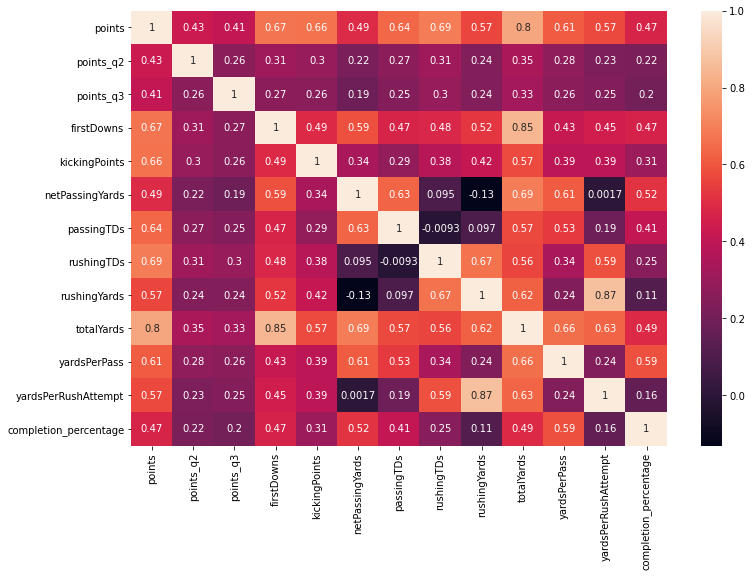

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(stats_df[most_corr].corr(),annot=True)

In [ ]:
#Get averages per game for each of the most correlated statistics